# Top Rated Movies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [3]:
# install chunk

In [4]:
dat = pd.read_csv('/Users/home/Documents/Projects/Python/Top Rated Movie 10.24/movie.csv')
dat

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477
...,...,...,...,...,...,...,...,...
8575,8575,10723,Bulletproof,An undercover police officer named Rock Keats ...,1996-09-06,12.428,5.700,569
8576,8576,397422,Rough Night,Five best friends from college reunite 10 year...,2017-06-15,19.368,5.688,1963
8577,8577,70435,Haywire,A black ops soldier seeks payback after she is...,2011-11-01,17.259,5.700,1333
8578,8578,36599,Prom Night,"At a high school senior prom, a masked killer ...",1980-07-18,15.854,5.700,414


In [15]:
print(dat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8580 non-null   int64  
 1   id            8580 non-null   int64  
 2   title         8580 non-null   object 
 3   overview      8579 non-null   object 
 4   release_date  8580 non-null   object 
 5   popularity    8580 non-null   float64
 6   vote_average  8580 non-null   float64
 7   vote_count    8580 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 536.4+ KB
None


In [16]:
dat['popularity'].describe()

count    8580.000000
mean       29.863904
std        53.930147
min         0.023000
25%        14.722750
50%        20.945500
75%        32.027750
max      3011.577000
Name: popularity, dtype: float64

###### not sure about the histogram below. need a better understanding of what the meta data is. definitions

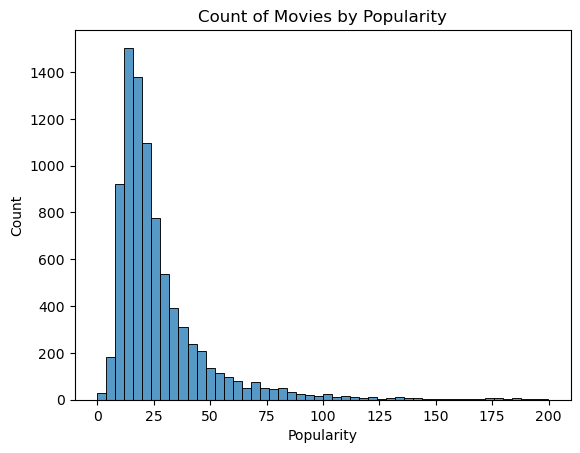

In [37]:
# Popularity Histogram

pop_filter = dat[(dat['popularity'] >= 0) & (dat['popularity'] <= 200)]
sns.histplot(pop_filter['popularity'], bins = 50)
plt.title("Count of Movies by Popularity")
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

In [8]:
dat['vote_average'].describe()

count    8580.000000
mean        6.804031
std         0.628188
min         5.688000
25%         6.300000
50%         6.769000
75%         7.272000
max         8.706000
Name: vote_average, dtype: float64

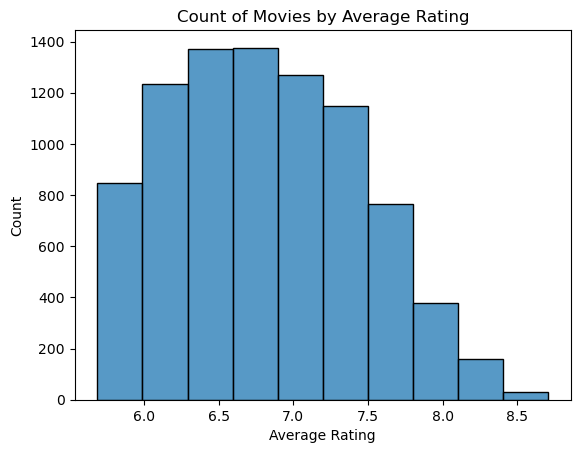

In [38]:
sns.histplot(dat, x = 'vote_average', bins = 10)
plt.title('Count of Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

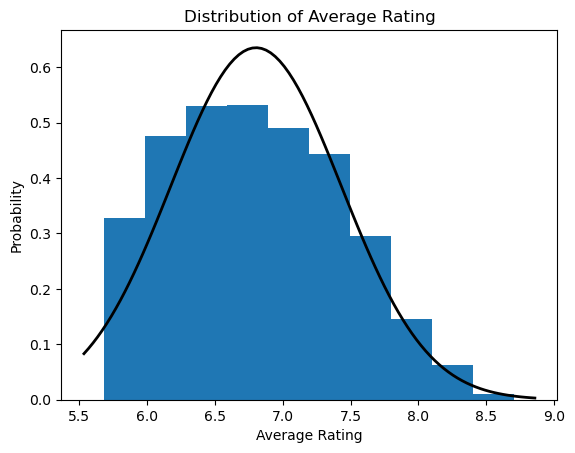

In [42]:
# Ratings Histogram

mu, std = norm.fit(dat['vote_average'])

plt.hist(dat['vote_average'], bins = 10, density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Probability')

plt.plot(x, p, 'k', linewidth = 2)



##### no bins! maybe something to mention in analysis

### Most popular _____

In [29]:
# 10 most popular movies


mp_movies = dat.sort_values(by = 'vote_average', ascending = False)

mp_movies.head(10)


,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
20,20,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,191.303,8.706,26757
21,21,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,152.632,8.690,20306
22,22,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,90.368,8.574,12244
23,23,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,92.258,8.565,15659
24,24,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,70.095,8.544,8490
25,25,129,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20,139.663,8.535,16288
26,26,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,53.491,8.531,4422
27,27,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,166.733,8.516,32494
28,28,496243,Parasite,"All unemployed, Ki-taek's family takes peculia...",2019-05-30,103.416,8.507,17981
29,29,497,The Green Mile,A supernatural tale set on death row in a Sout...,1999-12-10,97.284,8.507,17182


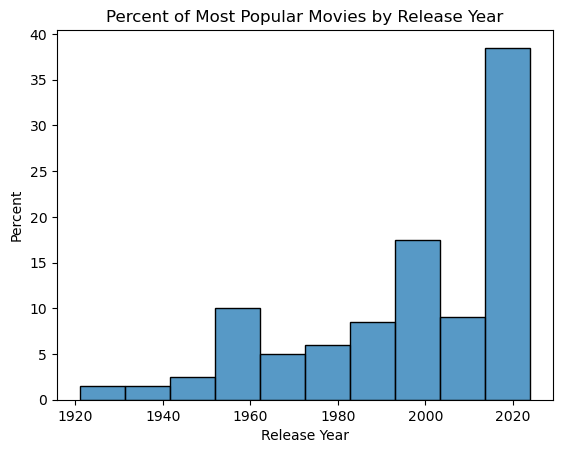

In [43]:
# bar graph of annual popularity

mp_movies['release_year'] = pd.to_datetime(mp_movies['release_date']).dt.year



sns.histplot(mp_movies['release_year'].head(200), bins = 10, stat = 'percent')
plt.title('Percent of Most Popular Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Percent')
plt.show()

